# I. Modélisation statistique

In [101]:
!pip install s3fs
!pip install pandas
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn

In [102]:
!pip install matplotlib

## I.1. Chargement et préparation des données

### Importation des données

In [103]:
import pandas as pd

# Importation des données avec code_insee en index
donnees = pd.read_csv("bdd_finale.csv", sep=',', encoding='utf-8', index_col=0)
donnees.head()

,beneficiaire_trans_eco,moyenne_conso_agri,moyenne_conso_indus,moyenne_conso_tertiaire,moyenne_conso_residentiel,moyenne_conso_totale,emissions_ges,nb_actes_france_renov,friche,ecoquartiers,...,CSP_maire,com_variation_encours_dette_ha_pct,nb_inactifs,nb_actifs,dependance_eco,abstention_municipales,taux_creation_ent,total_entreprises,nb_licencies_sportifs,part_jeunes_sans_diplome
code_insee,,,,,,,,,,,,,,,,,,,,,
22001,0,2.994071,0.000503,0.631181,3.688905,7.378017,24.951342,86,2,0,...,12,18.9,0.127517,0.471477,107,17.4,15.0,20,0.238255,9.1
22002,0,1.283886,0.032120,0.173206,3.248865,4.775226,7.509582,35,0,0,...,54,-39.3,0.110627,0.505226,96,53.8,12.1,33,0.308362,4.0
22003,0,0.000000,0.000000,0.524098,2.908468,3.472740,3.291304,43,0,0,...,56,99.8,0.142391,0.488043,113,53.7,36.7,30,0.357609,0.0
22004,0,0.200325,0.675332,1.267791,3.034877,5.203150,6.056133,46,6,0,...,33,-34.1,0.172349,0.405405,126,44.8,12.6,238,0.242827,12.4
22005,0,0.121358,0.082905,1.151104,3.532942,4.926877,4.019436,10,3,0,...,77,-14.5,0.141885,0.423712,140,22.9,18.8,64,0.278912,2.6


In [104]:
# Définir X et y pour avoir les variables explicatives et la variable à expliquer beneficiaire_trans_eco
X = donnees.drop(columns=['beneficiaire_trans_eco'])

# Variable à expliquer : beneficiaire_trans_eco
y = donnees["beneficiaire_trans_eco"]

In [105]:
import numpy as np

# Convertir les listes en tableaux numpy
X = np.array(X)
y = np.array(y)

In [106]:
print("Dimensions de X:", X.shape)
print("Dimensions de y:", y.shape)

Dimensions de X: (1189, 29)
Dimensions de y: (1189,)


In [107]:
np.unique(y)

array([0, 1], dtype=int64)

### Formatage des données

Nous allons pouvoir observer le type des données que nous avons. Cela va nous permettre de déterminer si on a besoin de modifier certaines variables pour qu'elles soient bien en variables catégorielles. 

In [108]:
donnees.dtypes

beneficiaire_trans_eco                  int64
moyenne_conso_agri                    float64
moyenne_conso_indus                   float64
moyenne_conso_tertiaire               float64
moyenne_conso_residentiel             float64
moyenne_conso_totale                  float64
emissions_ges                         float64
nb_actes_france_renov                   int64
friche                                  int64
ecoquartiers                            int64
nb_residences_secondaires               int64
beneficiaire_prog                       int64
climat                                  int64
gridens7                                int64
superf_choro                          float64
departement                             int64
gare_tgv                                int64
part_trajets_voiture                  float64
med_disp                                int64
p_pop                                   int64
CSP_maire                               int64
com_variation_encours_dette_ha_pct

In [109]:
# Conversion des variables en variables catégorielles
donnees["beneficiaire_trans_eco"] = donnees["beneficiaire_trans_eco"].astype('category')
donnees["friche"] = donnees["friche"].astype('category')
donnees["ecoquartiers"] = donnees["ecoquartiers"].astype('category')
donnees["beneficiaire_prog"] = donnees["beneficiaire_prog"].astype('category')
donnees["climat"] = donnees["climat"].astype('category')
donnees["gridens7"] = donnees["gridens7"].astype('category')
donnees["departement"] = donnees["departement"].astype('category')
donnees["gare_tgv"] = donnees["gare_tgv"].astype('category')
donnees["CSP_maire"] = donnees["CSP_maire"].astype('category')

In [110]:
donnees.dtypes

beneficiaire_trans_eco                category
moyenne_conso_agri                     float64
moyenne_conso_indus                    float64
moyenne_conso_tertiaire                float64
moyenne_conso_residentiel              float64
moyenne_conso_totale                   float64
emissions_ges                          float64
nb_actes_france_renov                    int64
friche                                category
ecoquartiers                          category
nb_residences_secondaires                int64
beneficiaire_prog                     category
climat                                category
gridens7                              category
superf_choro                           float64
departement                           category
gare_tgv                              category
part_trajets_voiture                   float64
med_disp                                 int64
p_pop                                    int64
CSP_maire                             category
com_variation

Nous allons observer si on a des données manquantes dans notre jeu de données.

In [111]:
donnees.isna().sum()

beneficiaire_trans_eco                0
moyenne_conso_agri                    0
moyenne_conso_indus                   0
moyenne_conso_tertiaire               0
moyenne_conso_residentiel             0
moyenne_conso_totale                  0
emissions_ges                         0
nb_actes_france_renov                 0
friche                                0
ecoquartiers                          0
nb_residences_secondaires             0
beneficiaire_prog                     0
climat                                0
gridens7                              0
superf_choro                          0
departement                           0
gare_tgv                              0
part_trajets_voiture                  0
med_disp                              0
p_pop                                 0
CSP_maire                             0
com_variation_encours_dette_ha_pct    0
nb_inactifs                           0
nb_actifs                             0
dependance_eco                        0


## I.2. Modélisation

### I.2.1. Régression logistique 

#### A) Construction du modèle et prévisions

Nous allons d'abord diviser notre jeu de données en jeux d'apprentissage et de test.

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # random_state=0 pour avoir le même mélange de données à chaque fois

In [113]:
X_train.shape, y_train.shape

((891, 29), (891,))

In [114]:
X_test.shape, y_test.shape

((298, 29), (298,))

Nous allons maintenant définir notre modèle de régression logistique

In [139]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

etapes = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]
modele_reg_log  = Pipeline(steps=etapes_smote) # Création du pipeline

On entraîne le modèle sur les données

In [140]:
modele_reg_log.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('oversampler', SMOTE()),
                ('reg_log', LogisticRegression())])

On cherche à prédire de nouvelles données grâce aux données test

In [141]:
y_pred_reg_log = modele_reg_log.predict(X_test)

#### B) Mesure de la performance

Nous allons maintenant évaluer la performance de notre modèle

In [142]:
score_reg_log = modele_reg_log.score(X_test, y_test)
print("Le score du modèle est : ", score_reg_log)

Le score du modèle est :  0.6342281879194631


In [143]:
# Calcul de l'accuracy
from sklearn.metrics import accuracy_score

accuracy_reg_log = accuracy_score(y_test, y_pred_reg_log)
print("L'accuracy est de : ", accuracy_reg_log)

L'accuracy est de :  0.6342281879194631


Nous allons construire la matrice de confusion pour avoir plus de précisions : 

In [144]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_reg_log = confusion_matrix(y_test, y_pred_reg_log)
print("La matrice de confusion est : \n", mat_conf_reg_log)


La matrice de confusion est : 
 [[152  92]
 [ 17  37]]


Text(0.5, 427.9555555555555, 'valeur prédite')

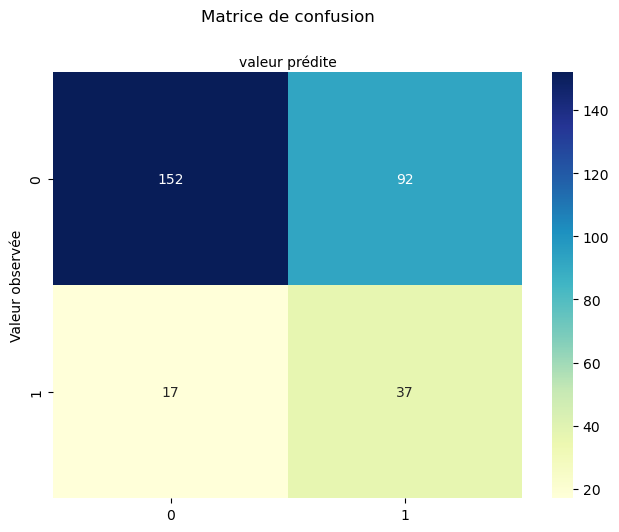

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_reg_log), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

Nous allons maintenant tracer la courbe ROC

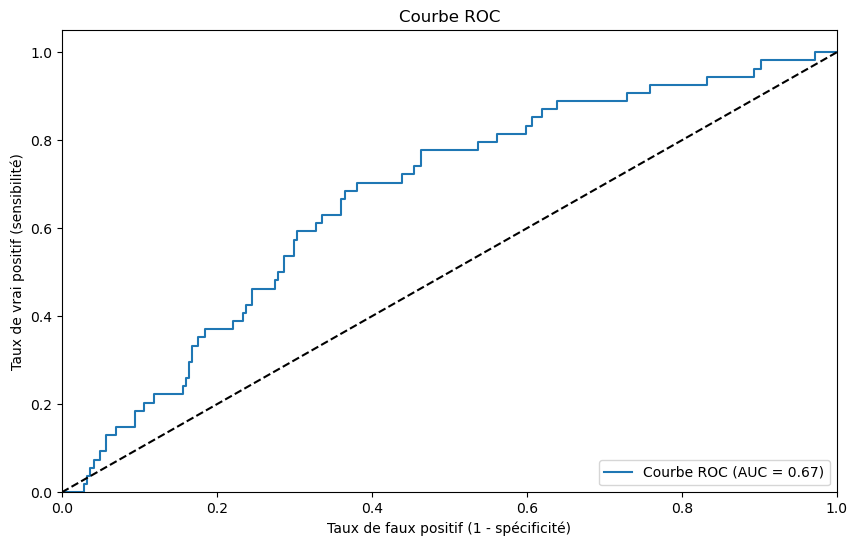

In [146]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_reg_log = modele_reg_log.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_reg_log) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

Nous allons maintenant calculer un score

In [147]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_reg_log = roc_auc_score(y_test, y_pred_prob_reg_log)
score_auc_reg_log

0.6678051001821493

In [148]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_reg_log = precision_score(y_test, y_pred_reg_log)
print("Precision:", precision_reg_log)

Precision: 0.2868217054263566


In [149]:
from sklearn.metrics import recall_score

recall_reg_log = recall_score(y_test, y_pred_reg_log)
print("Recall:", recall_reg_log)

Recall: 0.6851851851851852


In [150]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_reg_log = f1_score(y_test, y_pred_reg_log)
print("F1-Score:", f1_reg_log)

F1-Score: 0.40437158469945356


Nous allons faire un résumé des métriques pour ce modèle : 

In [151]:
# Résumé du modèle de régression logistique

print("Modèle de régression logistique \n")
#print("L'accuracy est de : ", accuracy_reg_log) # pas utile pour les données déséquilibrées
#print("Score du modèle:", score_reg_log) # pas utile pour les données déséquilibrées
print("Score AUC:", score_auc_reg_log) 
#print("Precision:", precision_reg_log) # on affiche déjà le F1-score
#print("Recall:", recall_reg_log) # on affiche déjà le F1-score
print("F1-Score:", f1_reg_log)

Modèle de régression logistique 

Score AUC: 0.6678051001821493
F1-Score: 0.40437158469945356


### I.2.3. Forêts Aléatoires 

#### A) Construction du modèle

In [152]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline

etapes = ([
    ("std_scaler", StandardScaler()),
    ("undersampler", RandomOverSampler()),
    ("clf_forets", RandomForestClassifier())
])

etapes_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE()), # Sur-échantillonnage
        ('clf_forets', RandomForestClassifier()), # Forets alétaoires 
        ]

model_random_forest = Pipeline(steps=etapes_smote)

model_random_forest.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('clf_forets', RandomForestClassifier())])

In [153]:
y_pred_random_forest = model_random_forest.predict(X_test)

#### B) Mesure de la performance

In [154]:
score_random_forest = model_random_forest.score(X_test, y_test)
print("Le score du modèle est : ", score_random_forest)

Le score du modèle est :  0.7718120805369127


In [155]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_random_forest = confusion_matrix(y_test, y_pred_reg_log)
print("La matrice de confusion est : \n", mat_conf_random_forest)

La matrice de confusion est : 
 [[152  92]
 [ 17  37]]


Text(0.5, 427.9555555555555, 'valeur prédite')

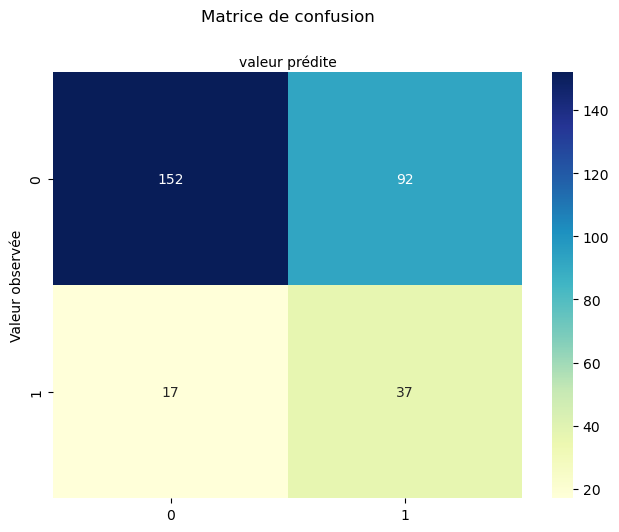

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_random_forest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

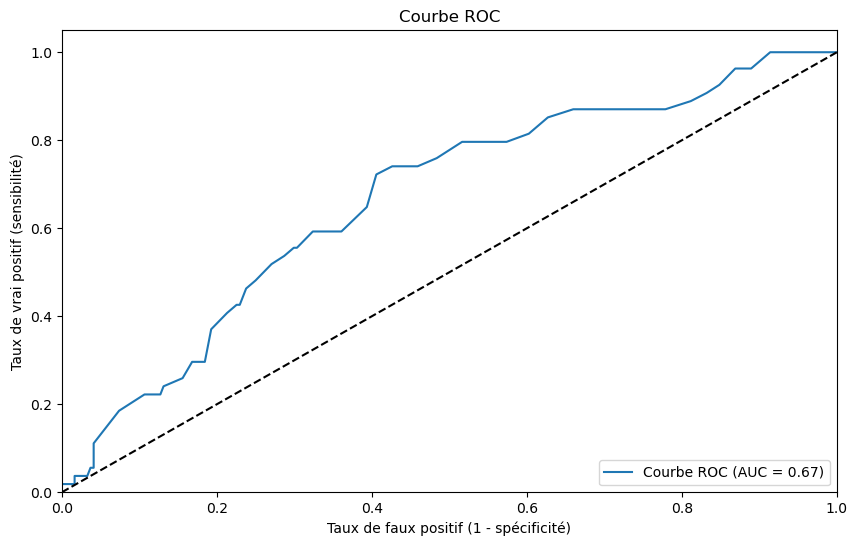

In [157]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_random_forest = model_random_forest.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_random_forest) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [158]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_random_forest = roc_auc_score(y_test, y_pred_prob_random_forest)
score_auc_random_forest

0.6658318154219793

In [159]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_random_forest = precision_score(y_test, y_pred_random_forest)
print("Precision:", precision_random_forest)

Precision: 0.3157894736842105


In [160]:
from sklearn.metrics import recall_score

recall_random_forest = recall_score(y_test, y_pred_random_forest)
print("Recall:", recall_random_forest)

Recall: 0.2222222222222222


In [161]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_random_forest = f1_score(y_test, y_pred_random_forest)
print("F1-Score:", f1_reg_log)

F1-Score: 0.40437158469945356


In [162]:
# Résumé du modèle de forêts aléatoires

print("Modèle de forêts aléatoires \n")
print("Score AUC:", score_auc_random_forest) 
print("F1-Score:", f1_random_forest)

Modèle de forêts aléatoires 

Score AUC: 0.6658318154219793
F1-Score: 0.2608695652173913


## I.3. Sélection du meilleur modèle